# Exercises for Practice

## Exercise 01 -- Nobel Prize Winners 
Georgios Karamanis gathered and shared data on Nobel prize winners over the years, with a fair amount of detail, and used in the `tidytuesday` series a while back. These data are to be used for the questions that follow. 

In [1]:
readr::read_csv(
    "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-05-14/nobel_winners.csv"
    ) -> nobel_winners 

Rows: 969 Columns: 18

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (14): category, prize, motivation, prize_share, laureate_type, full_nam...
dbl   (2): prize_year, laureate_id
date  (2): birth_date, death_date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



|variable             |class     |description |
|:---|:---|:-----------|
|prize_year           |double    | Year that Nobel Prize was awarded|
|category             |character | Field of study/category|
|prize                |character | Prize Name |
|motivation           |character | Motivation of the award |
|prize_share          |character | Share eg 1 of 1, 1 of 2, 1 of 4, etc |
|laureate_id          |double    | ID assigned to each winner |
|laureate_type        |character | Individual or organization  |
|full_name            |character | name of the winner|
|birth_date           |double    | birth date of winner |
|birth_city           |character | birth city/state of winner |
|birth_country        |character | birth country of winner |
|gender               |character | binary gender of the winner |
|organization_name    |character | organization name |
|organization_city    |character | organization city |
|organization_country |character | organization country |
|death_date           |double    | death date of the winner (if dead) |
|death_city           |character | death city (if dead) |
|death_country        |character | death country (if dead) |

(a) First create `nobel.df` that keeps only records starting in the year 1960, and only for the "Physics" category. Now generate an appropriate chart that shows the distribution of winners by `birth_country` 

In [2]:
library(tidyverse)

nobel_winners %>%
    filter(
        prize_year >= 1960, category == "Physics"
    ) -> nobel.df

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



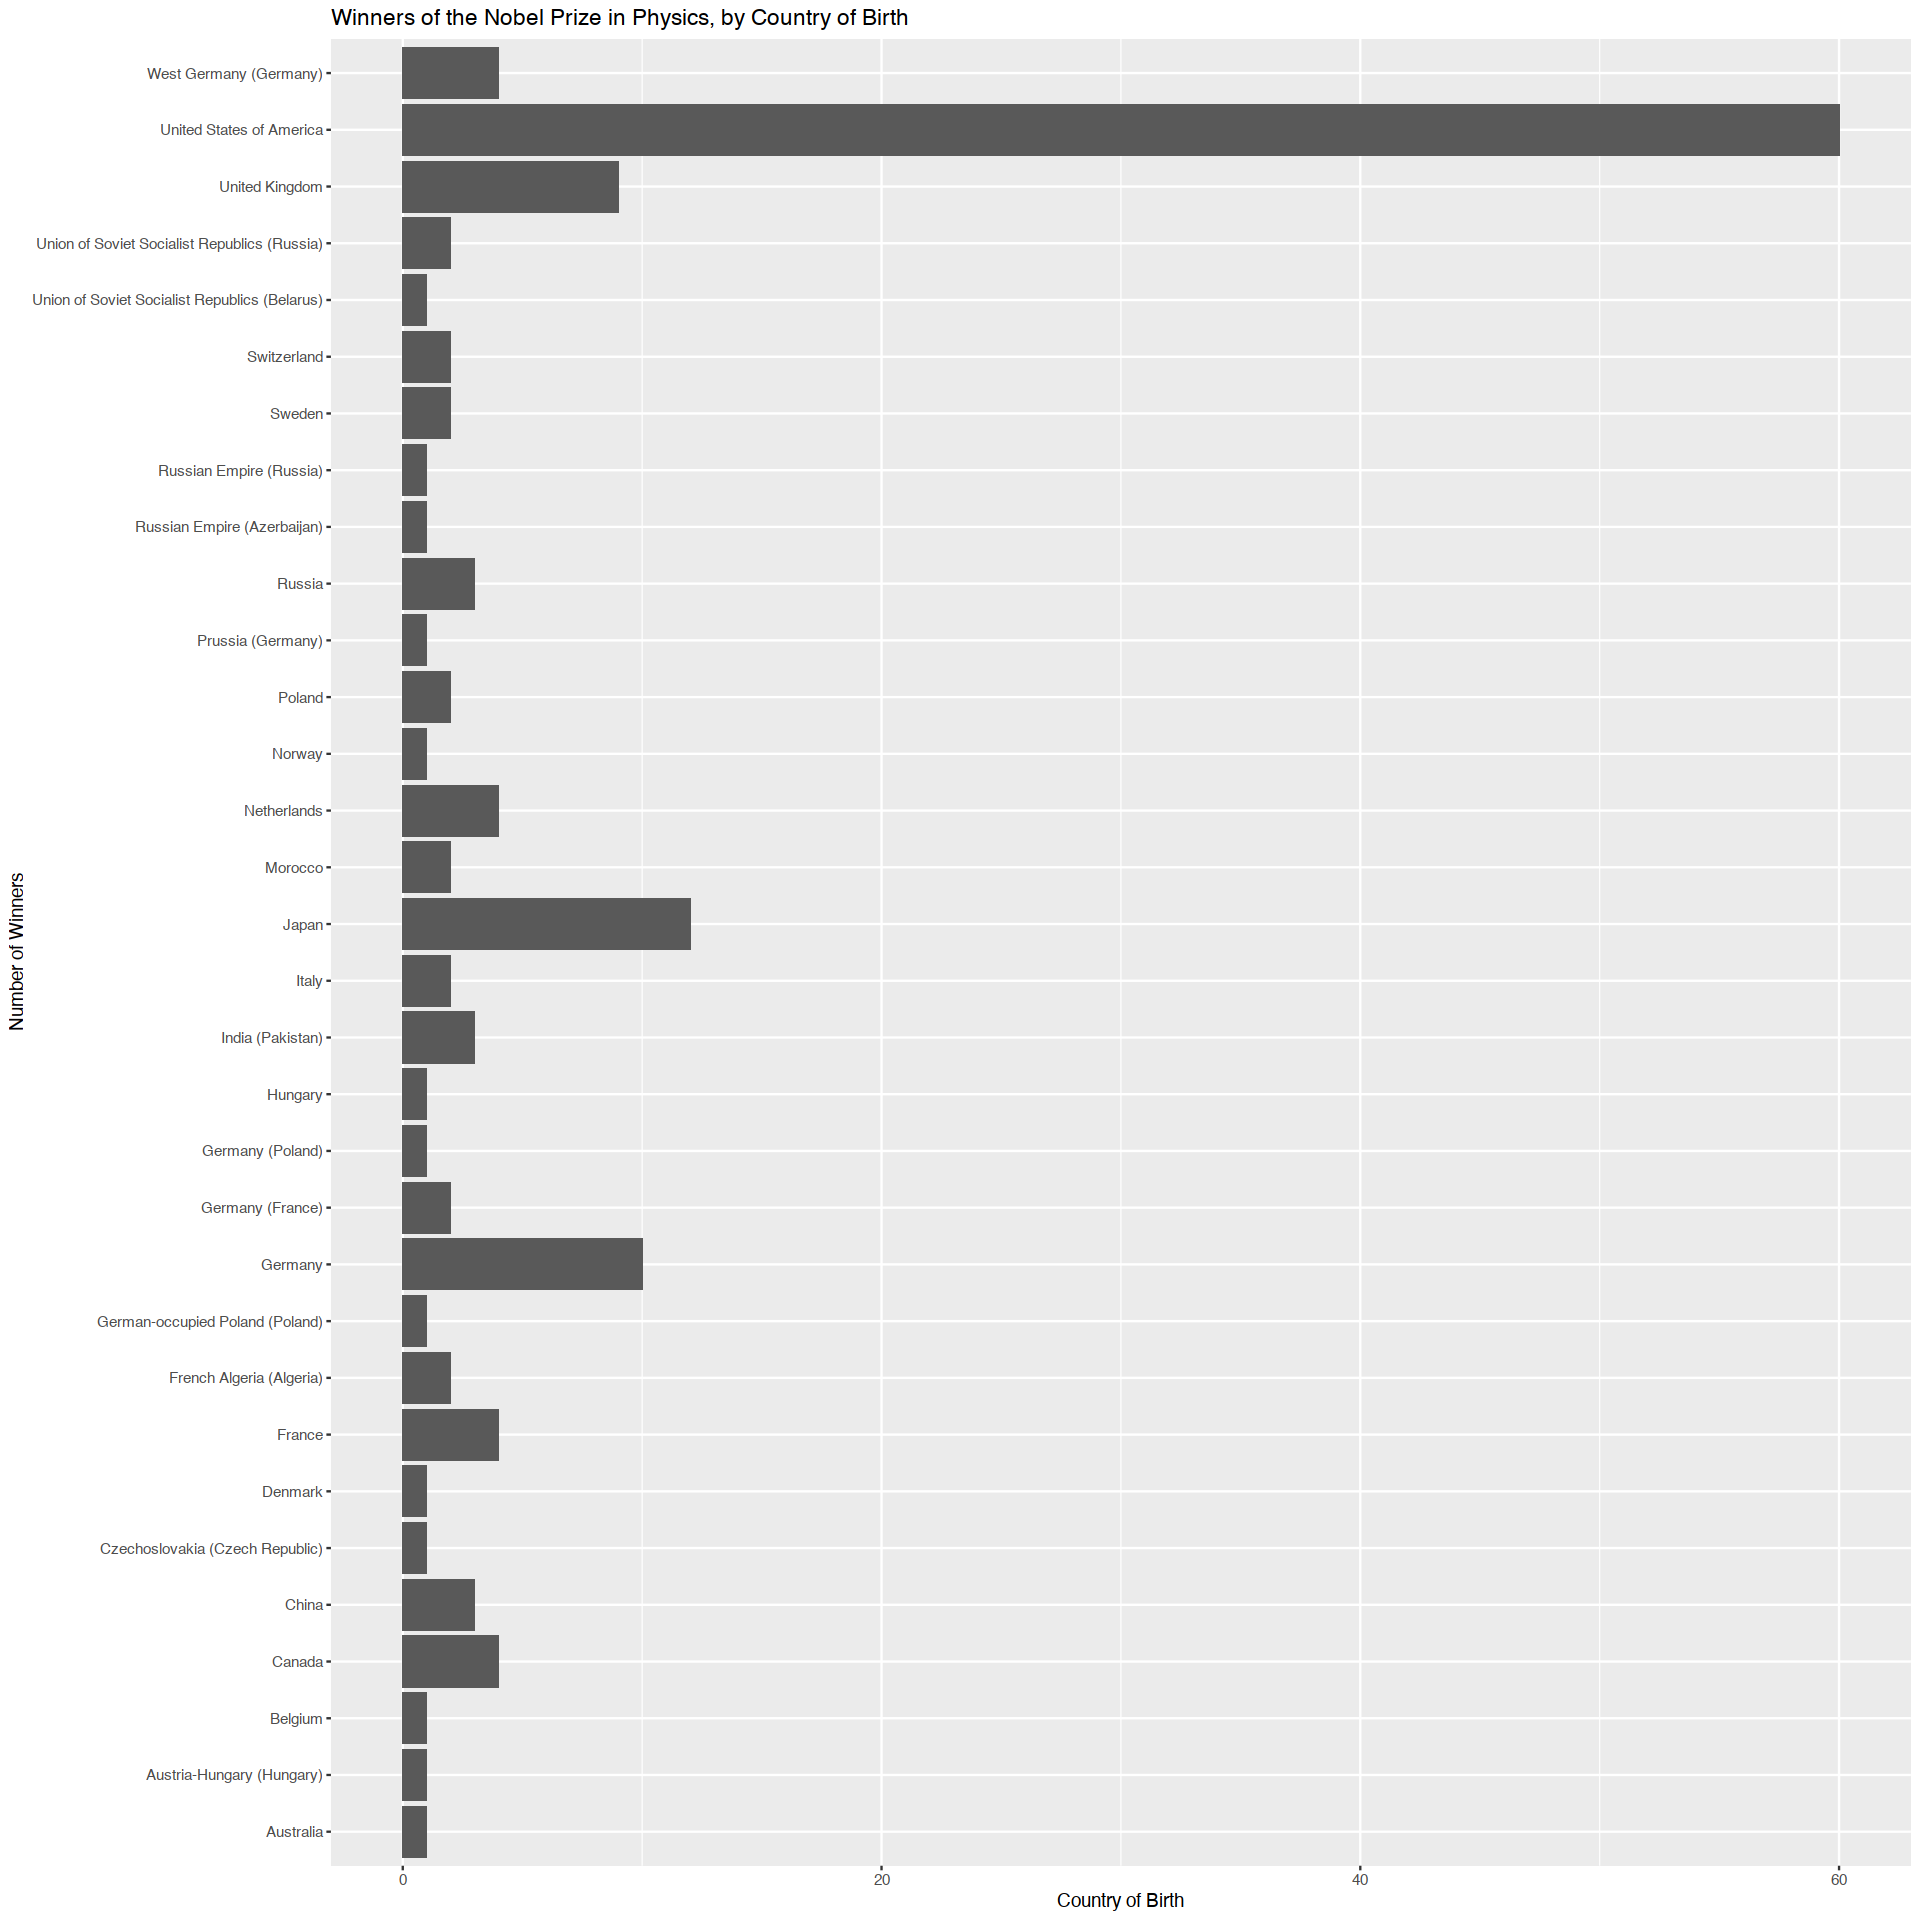

In [3]:
options(repr.plot.width = 16, repr.plot.height = 16) 

ggplot(
    data = nobel.df, 
    aes(x = birth_country)
    ) +
    geom_bar() +
    labs(
        title = "Winners of the Nobel Prize in Physics, by Country of Birth",
        x = "Number of Winners",
        y = "Country of Birth"
    ) +
    coord_flip() 


(b) Now break this distribution out by `gender` to see how winners by country differs across gender 

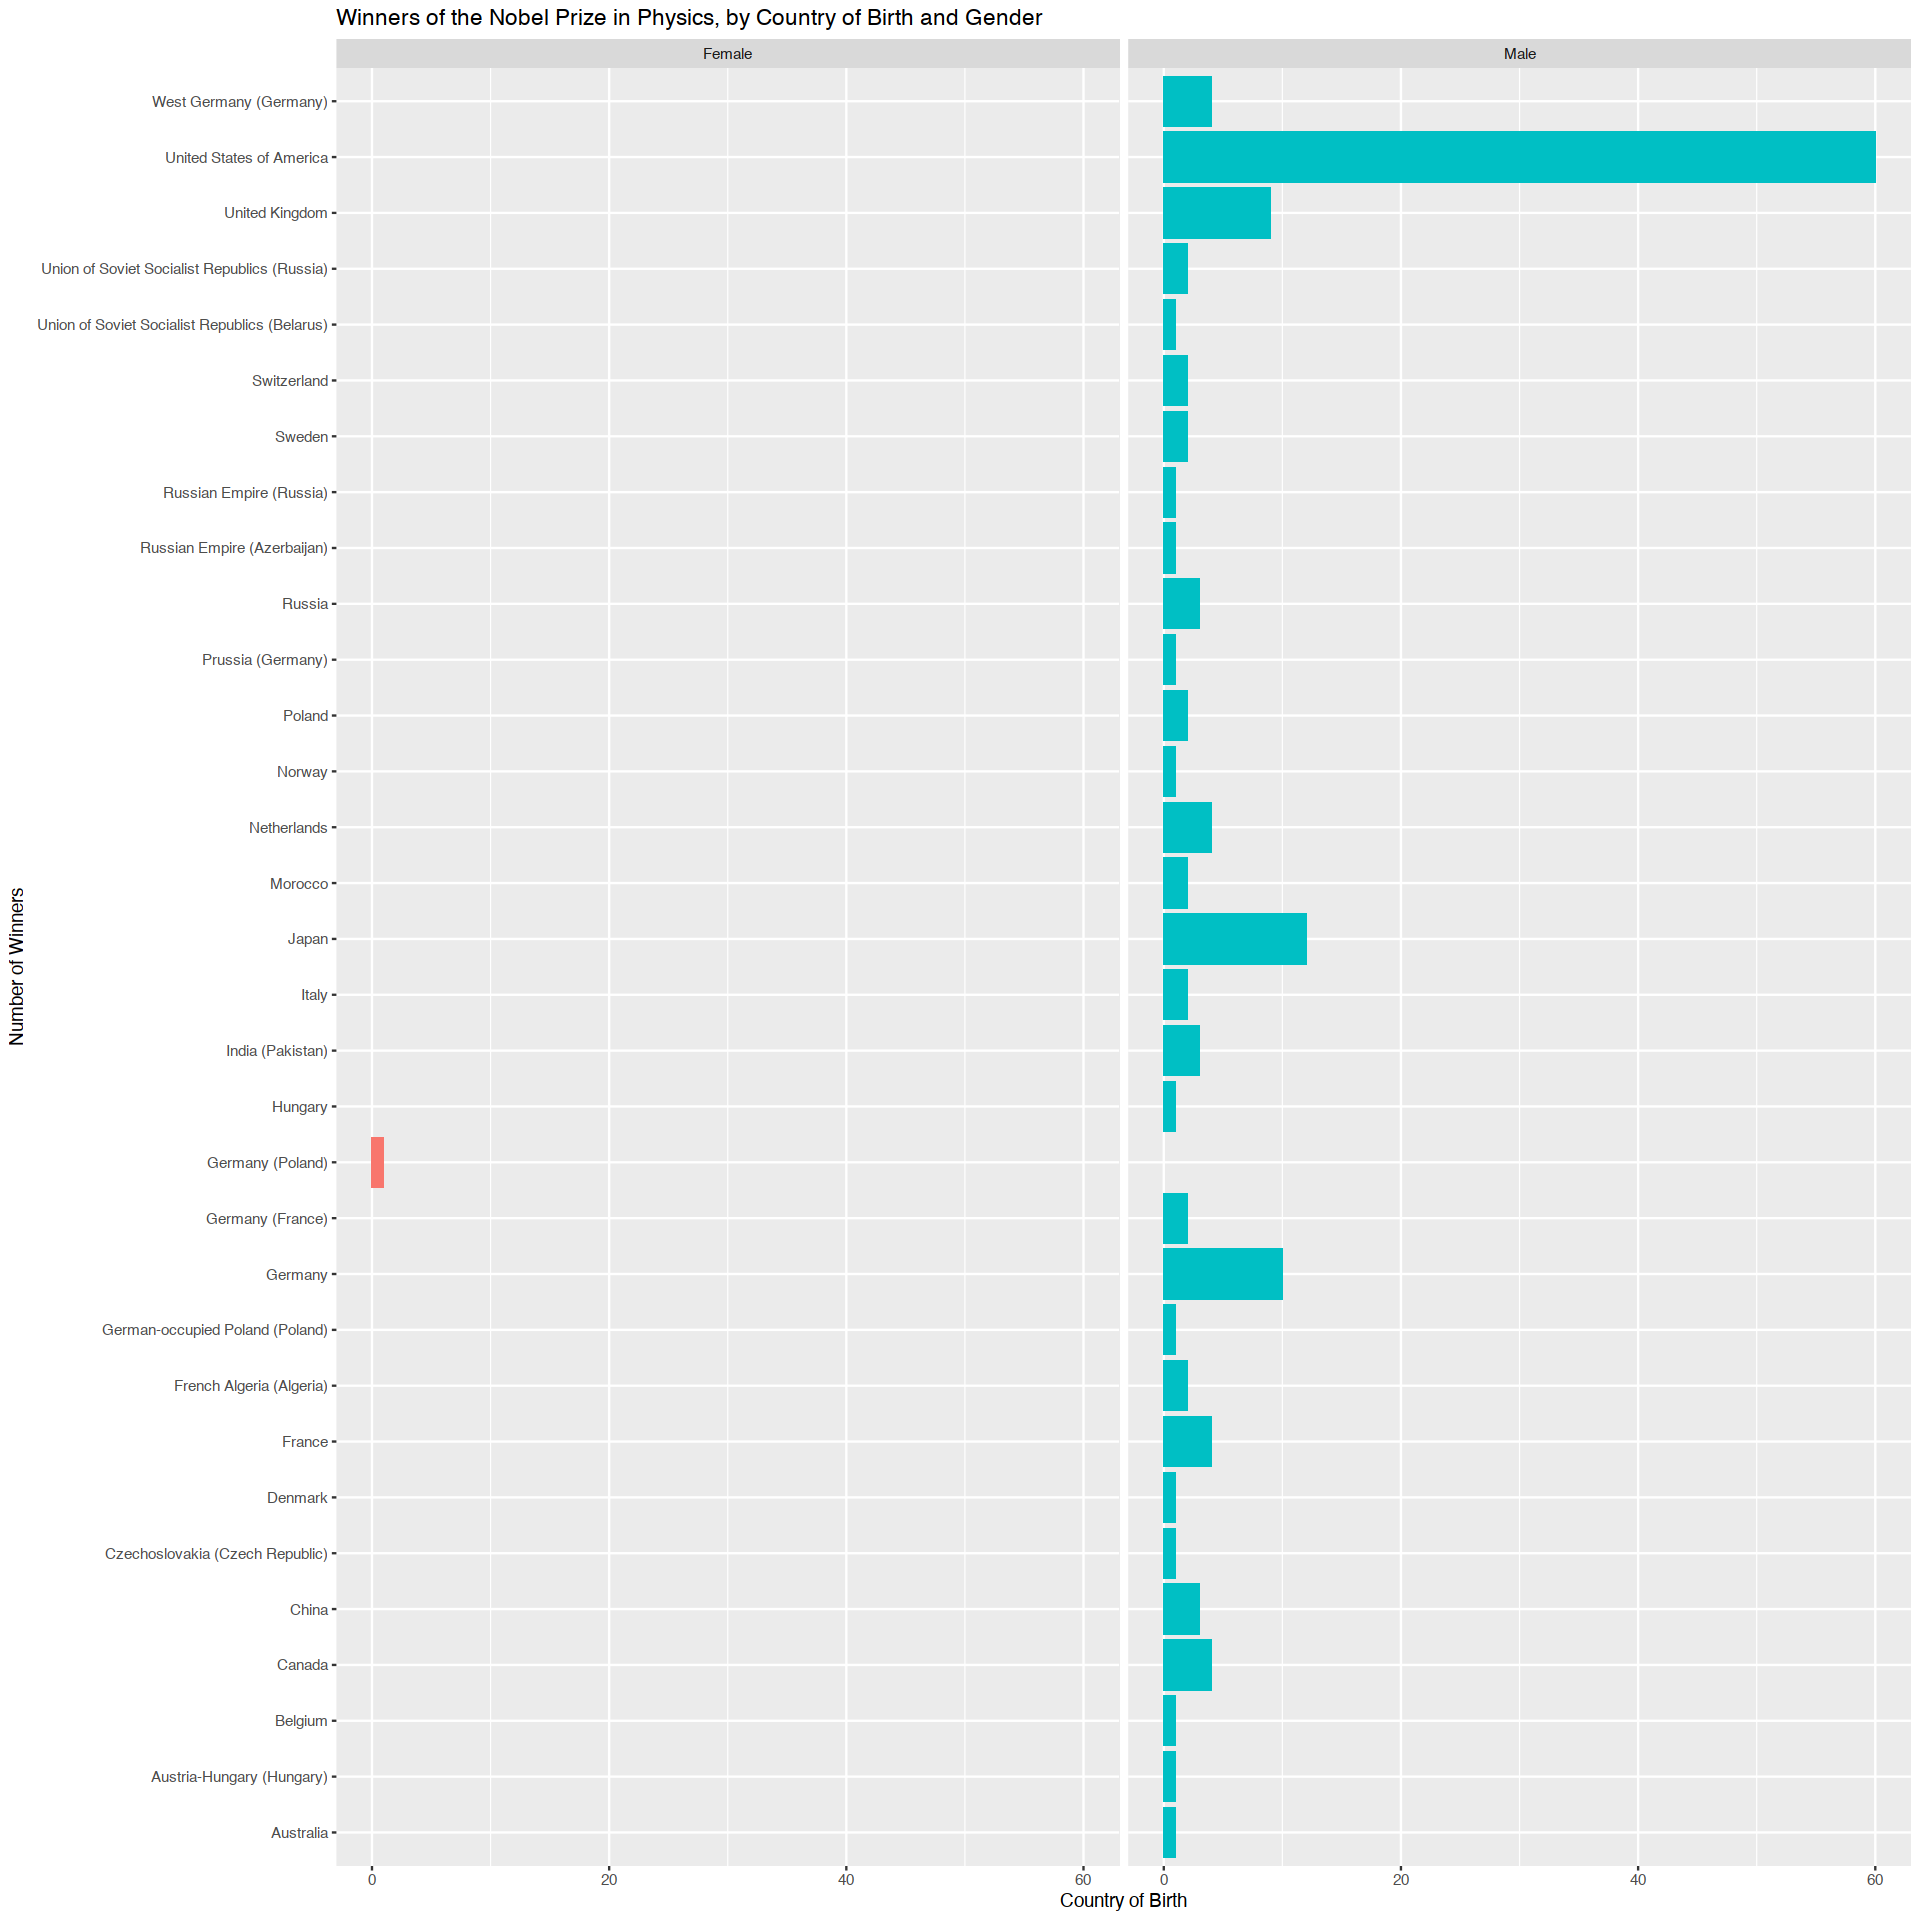

In [4]:
ggplot(
    data = nobel.df, 
    aes(x = birth_country, fill = gender)
    ) +
    geom_bar() +
    labs(
        title = "Winners of the Nobel Prize in Physics, by Country of Birth and Gender",
        x = "Number of Winners",
        y = "Country of Birth"
    ) +
    facet_wrap(~ gender) +
    coord_flip() +
    theme(legend.position = "none") 

(c) Now go back to `noble_winners`, the full data-set, and create a simple plot that shows the distribution of prize winners by `death_country`, `gender`, and `category`  

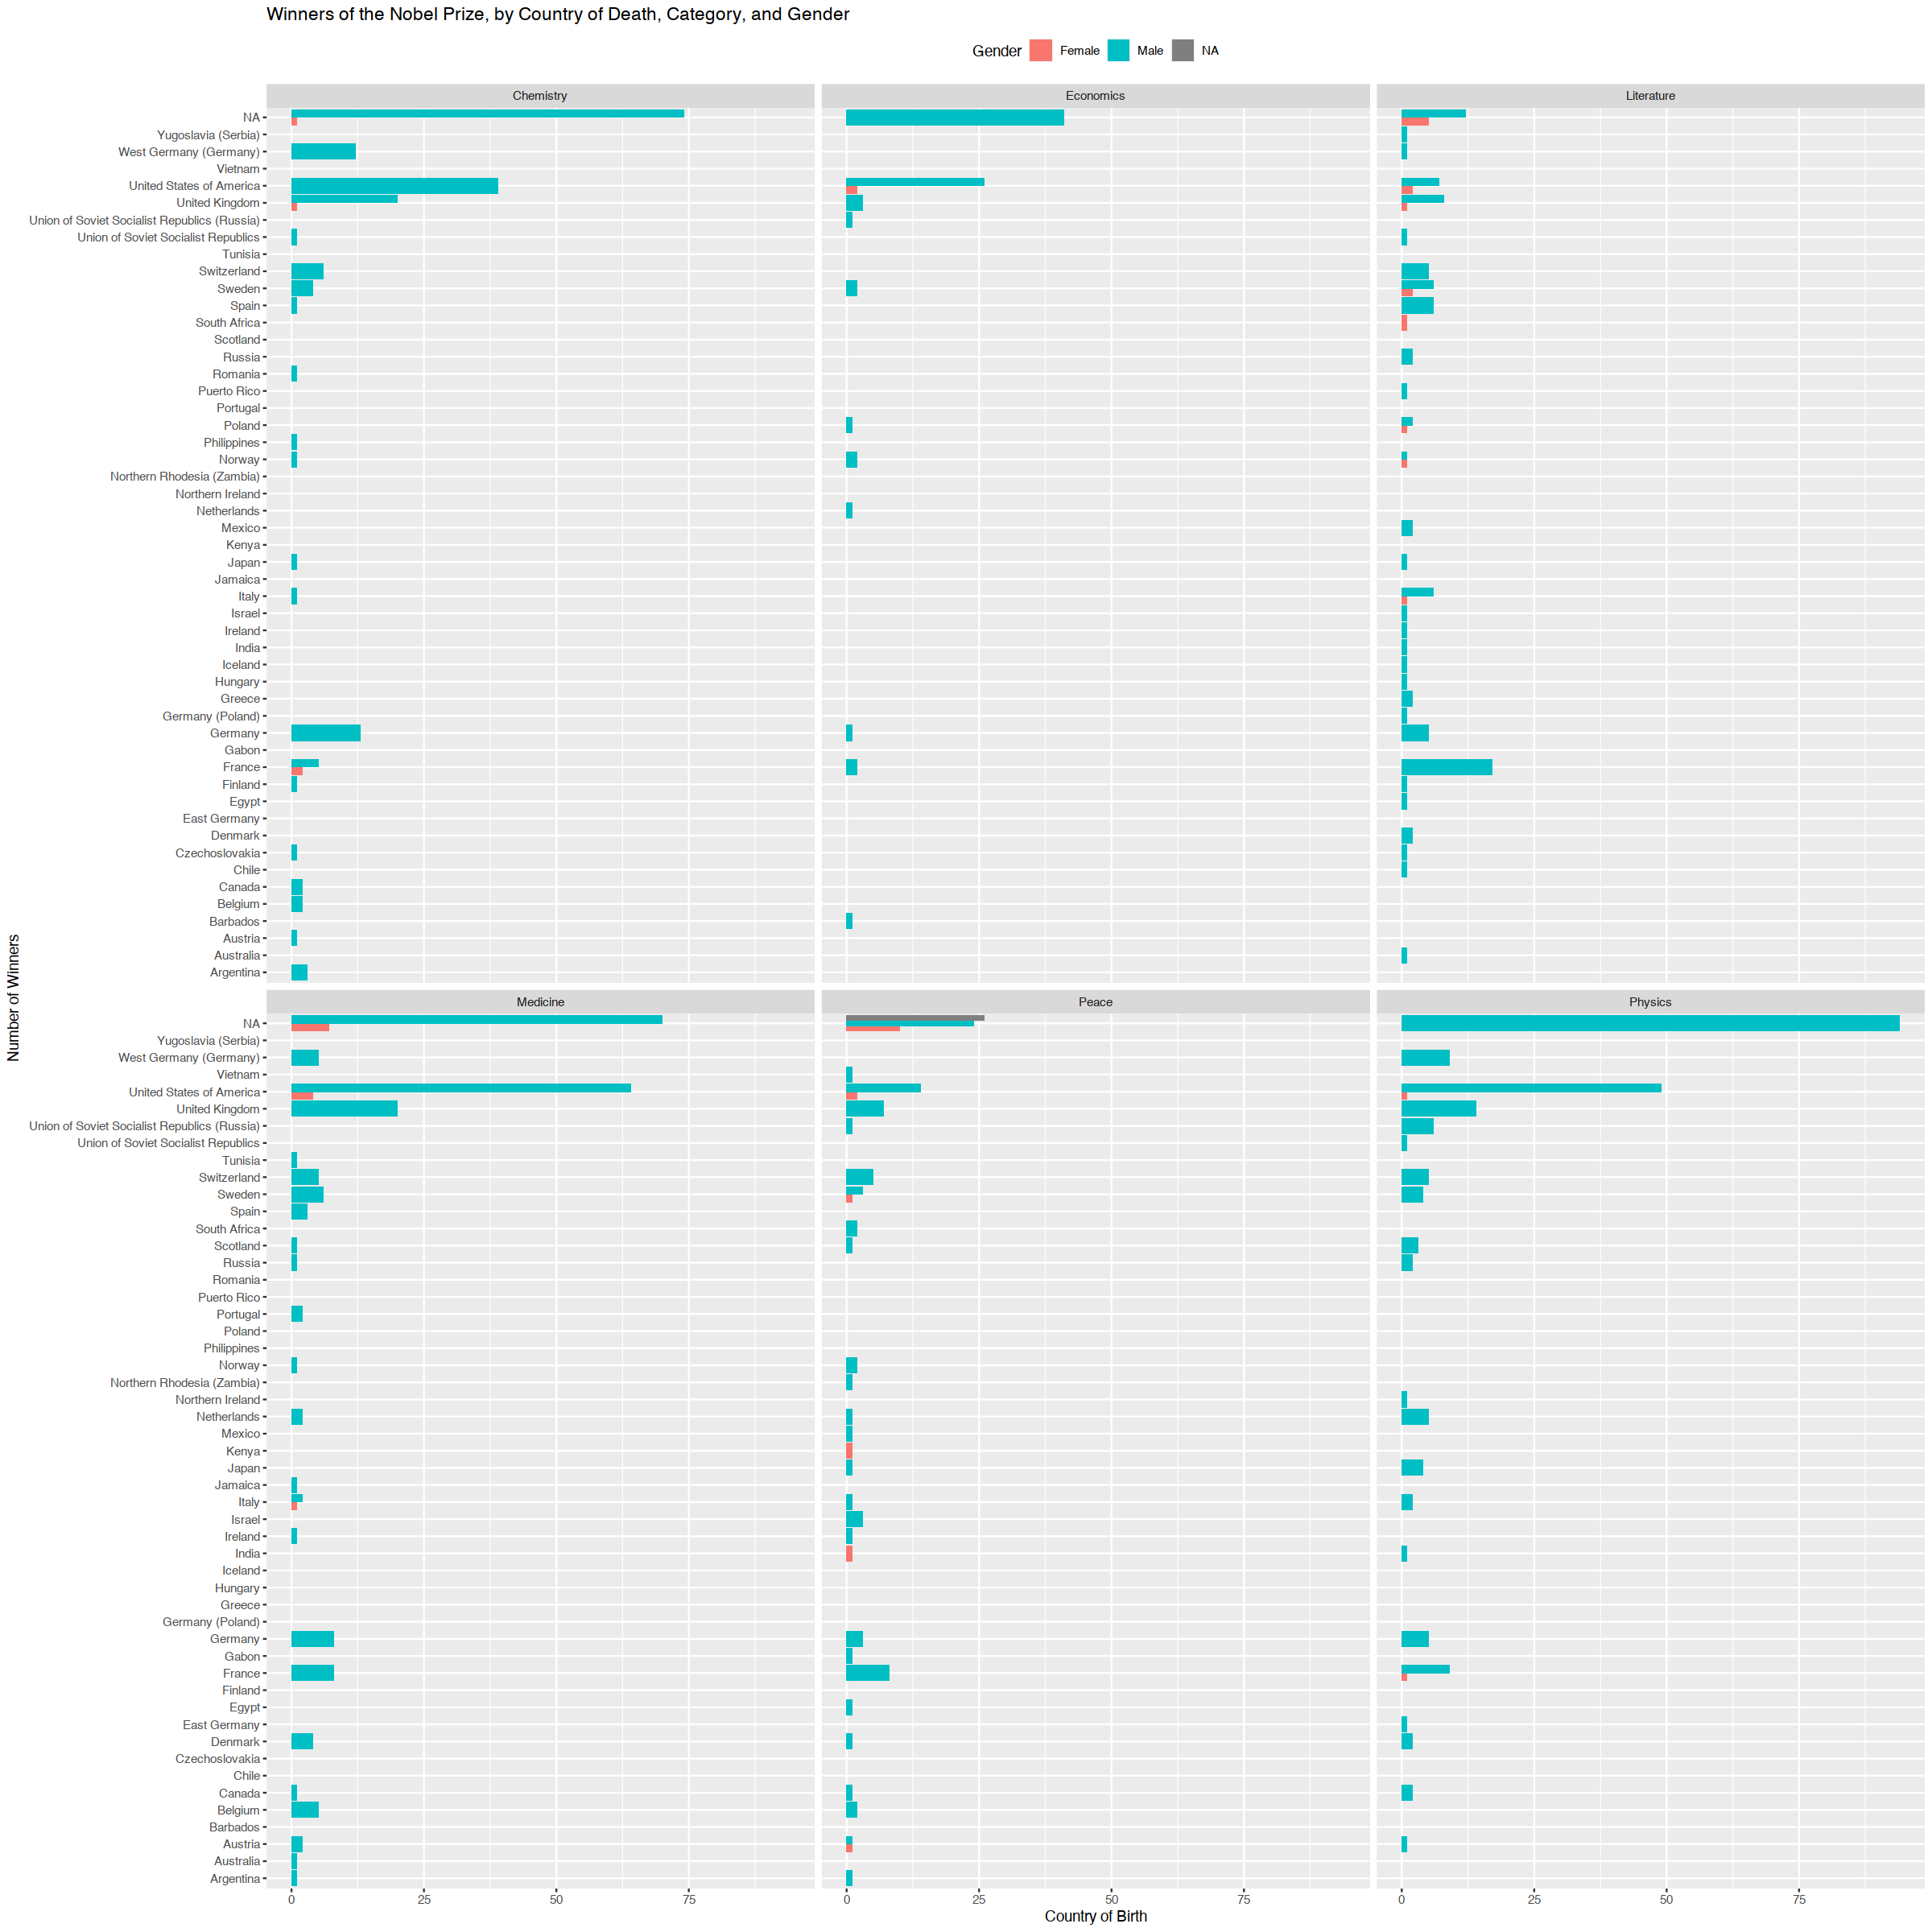

In [5]:
options(repr.plot.width = 20, repr.plot.height = 20) 

ggplot(
    data = nobel_winners, 
    aes(x = death_country, fill = gender)
    ) +
    geom_bar(position = "dodge") +
    labs(
        title = "Winners of the Nobel Prize, by Country of Death, Category, and Gender",
        x = "Number of Winners",
        y = "Country of Birth",
        fill = "Gender"
    ) +
    facet_wrap(~ category) +
    coord_flip() +
    theme(legend.position = "top") 

## Exercise 02 -- Water levels in the Great Lakes

Download the monthly Great Lakes water level data-set [SPSS format from here](https://aniruhil.github.io/avsr/teaching/dataviz/greatlakes.sav) and [Excel format from here](https://aniruhil.github.io/avsr/teaching/dataviz/greatlakes.xlsx). *Note that water level is in meters.* 

You may use the following command to read in the excel file: 

In [6]:
library(readxl)
url <- "https://aniruhil.github.io/avsr/teaching/dataviz/greatlakes.xlsx"
destfile <- "greatlakes.xlsx"
curl::curl_download(url, destfile)
read_excel(destfile, col_types = c("date", 
     "numeric", "numeric", "numeric", "numeric", 
     "numeric")) -> greatlakes 

greatlakes %>%
    head()

monthyear,Superior,MichiganHuron,St.Clair,Erie,Ontario
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1918-01-01,183.25,176.71,174.59,173.90,74.74
1918-02-01,183.20,176.73,174.74,173.82,74.72
1918-03-01,183.17,176.80,174.74,174.01,74.92
1918-04-01,183.14,176.89,174.84,174.02,75.10
1918-05-01,183.22,176.99,175.00,173.98,75.09
1918-06-01,183.34,177.07,175.14,174.10,75.06


Now use an appropriate chart to show the water level for Lake Superior. 

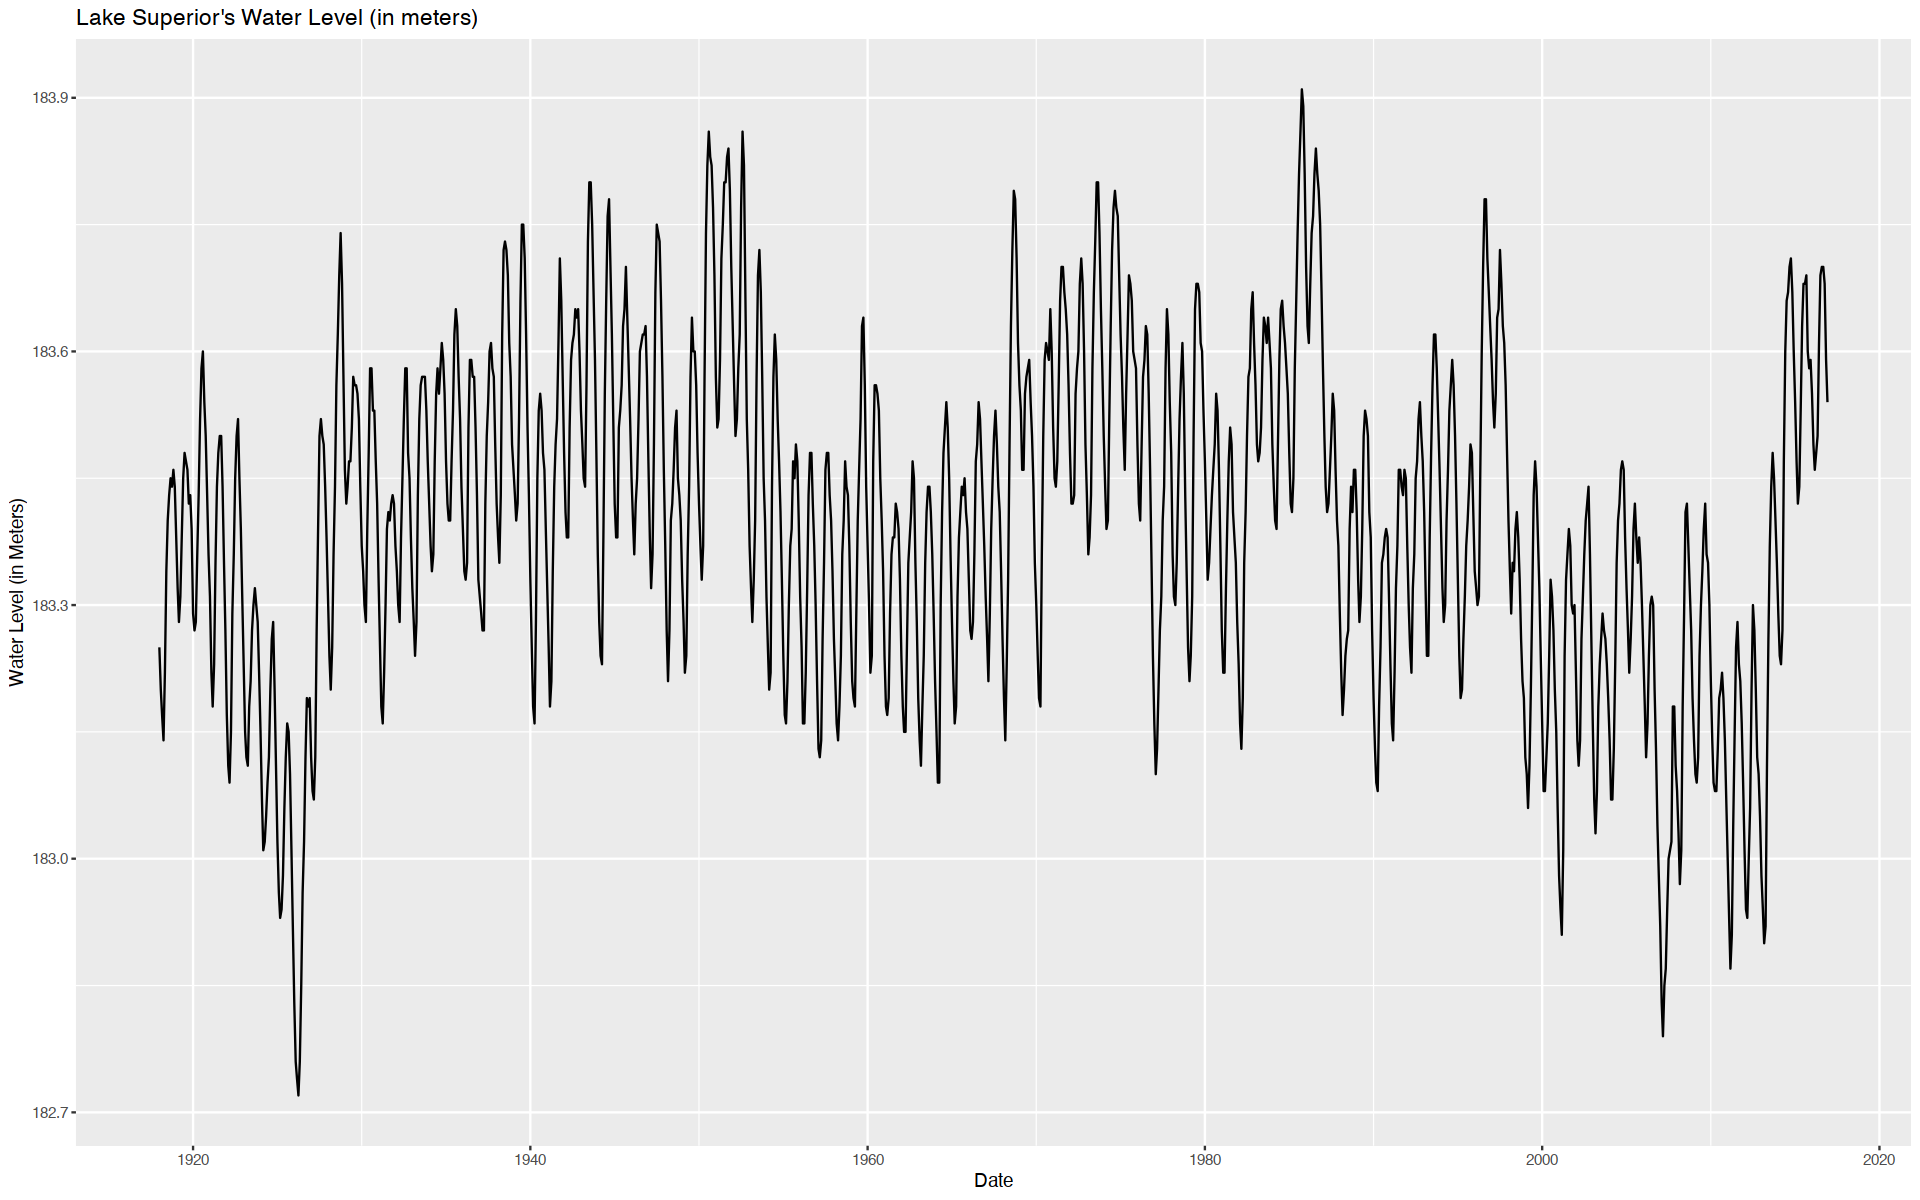

In [7]:
options(repr.plot.width = 16, repr.plot.height = 10) 

ggplot(
    data = greatlakes,
    aes(x = monthyear, y = Superior)
    ) +
    geom_line() +
    labs(
        title = "Lake Superior's Water Level (in meters)",
        x = "Date",
        y = "Water Level (in Meters)"
        )
    

## Exercise 03 -- County Health Rankings

Download the 2017 County Health Rankings data [SPSS format from here](https://aniruhil.github.io/avsr/teaching/dataviz/CountyHealthRankings2017.sav), [Excel format from here](https://aniruhil.github.io/avsr/teaching/dataviz/CountyHealthRankings2017.xlsx) and the [accompanying codebook](http://www.countyhealthrankings.org/sites/default/files/2017TrendsDocumentation.pdf). 

These data can also be downloaded with the code provided below: 

In [8]:
library(readxl)

url <- "https://aniruhil.github.io/avsr/teaching/dataviz/CountyHealthRankings2017.xlsx"
destfile <- "CountyHealthRankings2017.xlsx"
curl::curl_download(url, destfile)
read_excel(destfile) -> chr.df 

chr.df %>%
    head()

state,Adult_obesity,Children_in_poverty,Diabetes_monitoring,High_school_graduation,Premature_death,Preventable_hospital_stays,Unemployment_rate
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AK,0.29,0.15,0.75,0.76,7403.4,35.99,0.06
AL,0.34,0.27,0.85,0.89,9573.2,61.13,0.06
AR,0.34,0.26,0.84,0.85,9150.7,61.95,0.05
AZ,0.26,0.25,0.80,0.78,6787.7,36.97,0.06
CA,0.23,0.21,0.82,NA,5213.2,35.74,0.06
CO,0.20,0.15,0.84,0.77,5711.5,32.09,0.04


Construct appropriate plots that shows the relationship between the following pairs of variables 

(a) Adult obesity and High school graduation 

Warning message:
“Removed 2 rows containing missing values (geom_point).”


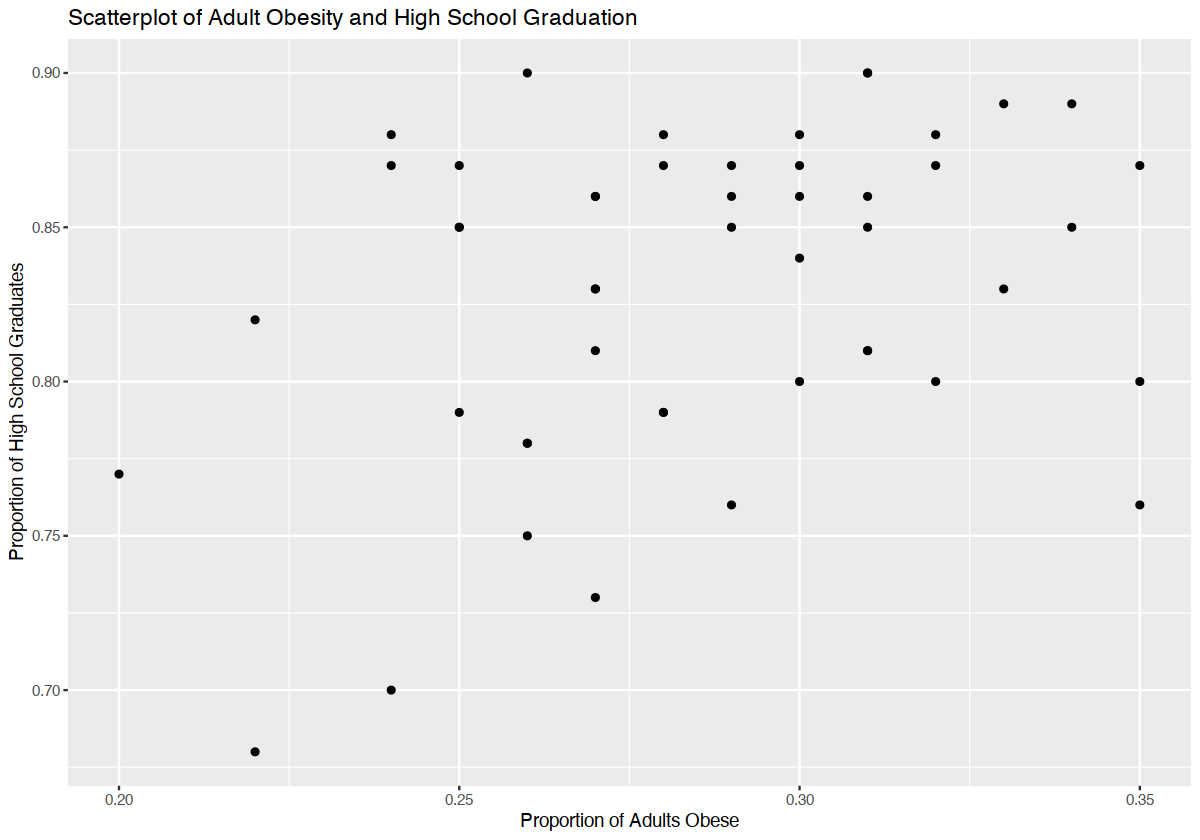

In [9]:
options(repr.plot.width = 10, repr.plot.height = 7) 

ggplot(
    data = chr.df,
    aes(x = Adult_obesity, y = High_school_graduation)
    ) +
    geom_point() +
    labs(
        title = "Scatterplot of Adult Obesity and High School Graduation",
        x = "Proportion of Adults Obese",
        y = "Proportion of High School Graduates"
    )

(b) Children in poverty and High school graduation 

Warning message:
“Removed 2 rows containing missing values (geom_point).”


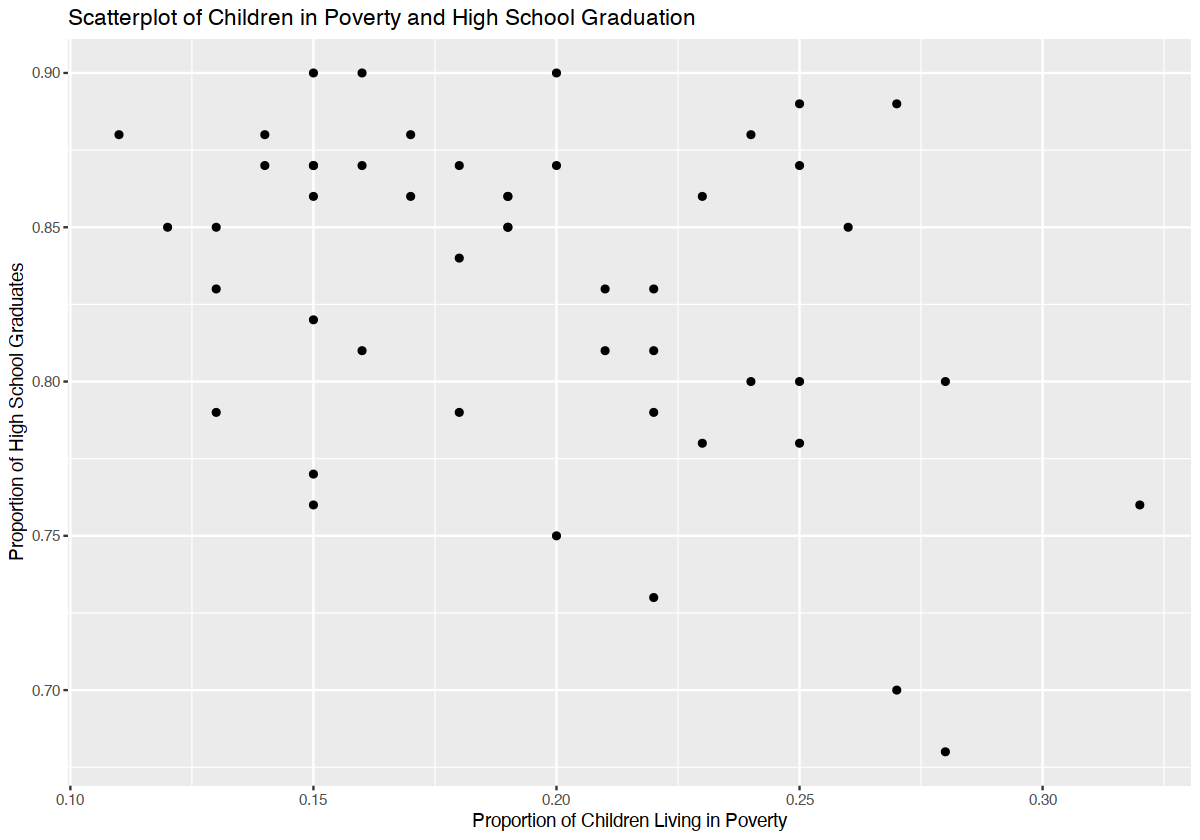

In [10]:
ggplot(
    data = chr.df,
    aes(x = Children_in_poverty, y = High_school_graduation)
    ) +
    geom_point() +
    labs(
        title = "Scatterplot of Children in Poverty and High School Graduation",
        x = "Proportion of Children Living in Poverty",
        y = "Proportion of High School Graduates"
    )

(c) Preventable hospital stays and Unemployment rate 

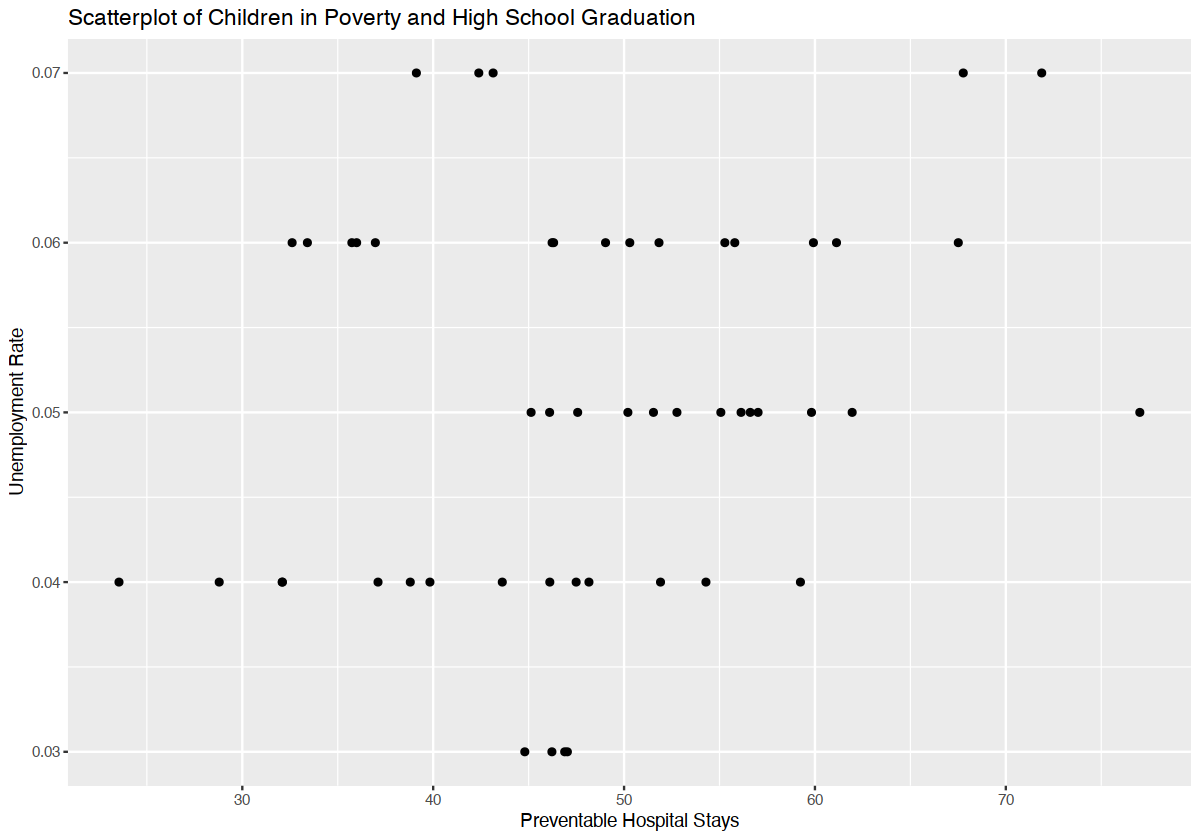

In [11]:
ggplot(
    data = chr.df,
    aes(x = Preventable_hospital_stays, y = Unemployment_rate)
    ) +
    geom_point() +
    labs(
        title = "Scatterplot of Children in Poverty and High School Graduation",
        x = "Preventable Hospital Stays",
        y = "Unemployment Rate"
    )

## Exercise 04 -- Unemployment Rates

Use the unemployment data given to you `(unemprate.RData)` and construct appropriate plots that show the distribution of unemployment rates across years for each of the four educational attainment groups. 

In [12]:
load("data/unemprate.RData")

urate %>%
    head()

yearmonth,educ_group,rate
<date>,<chr>,<dbl>
2007-04-01,BA_or_more,1.9
2007-08-01,BA_or_more,2.1
2007-12-01,BA_or_more,2.1
2007-02-01,BA_or_more,1.9
2007-01-01,BA_or_more,2.1
2007-07-01,BA_or_more,2.1


Be sure to use a unique color for each educational attainment group

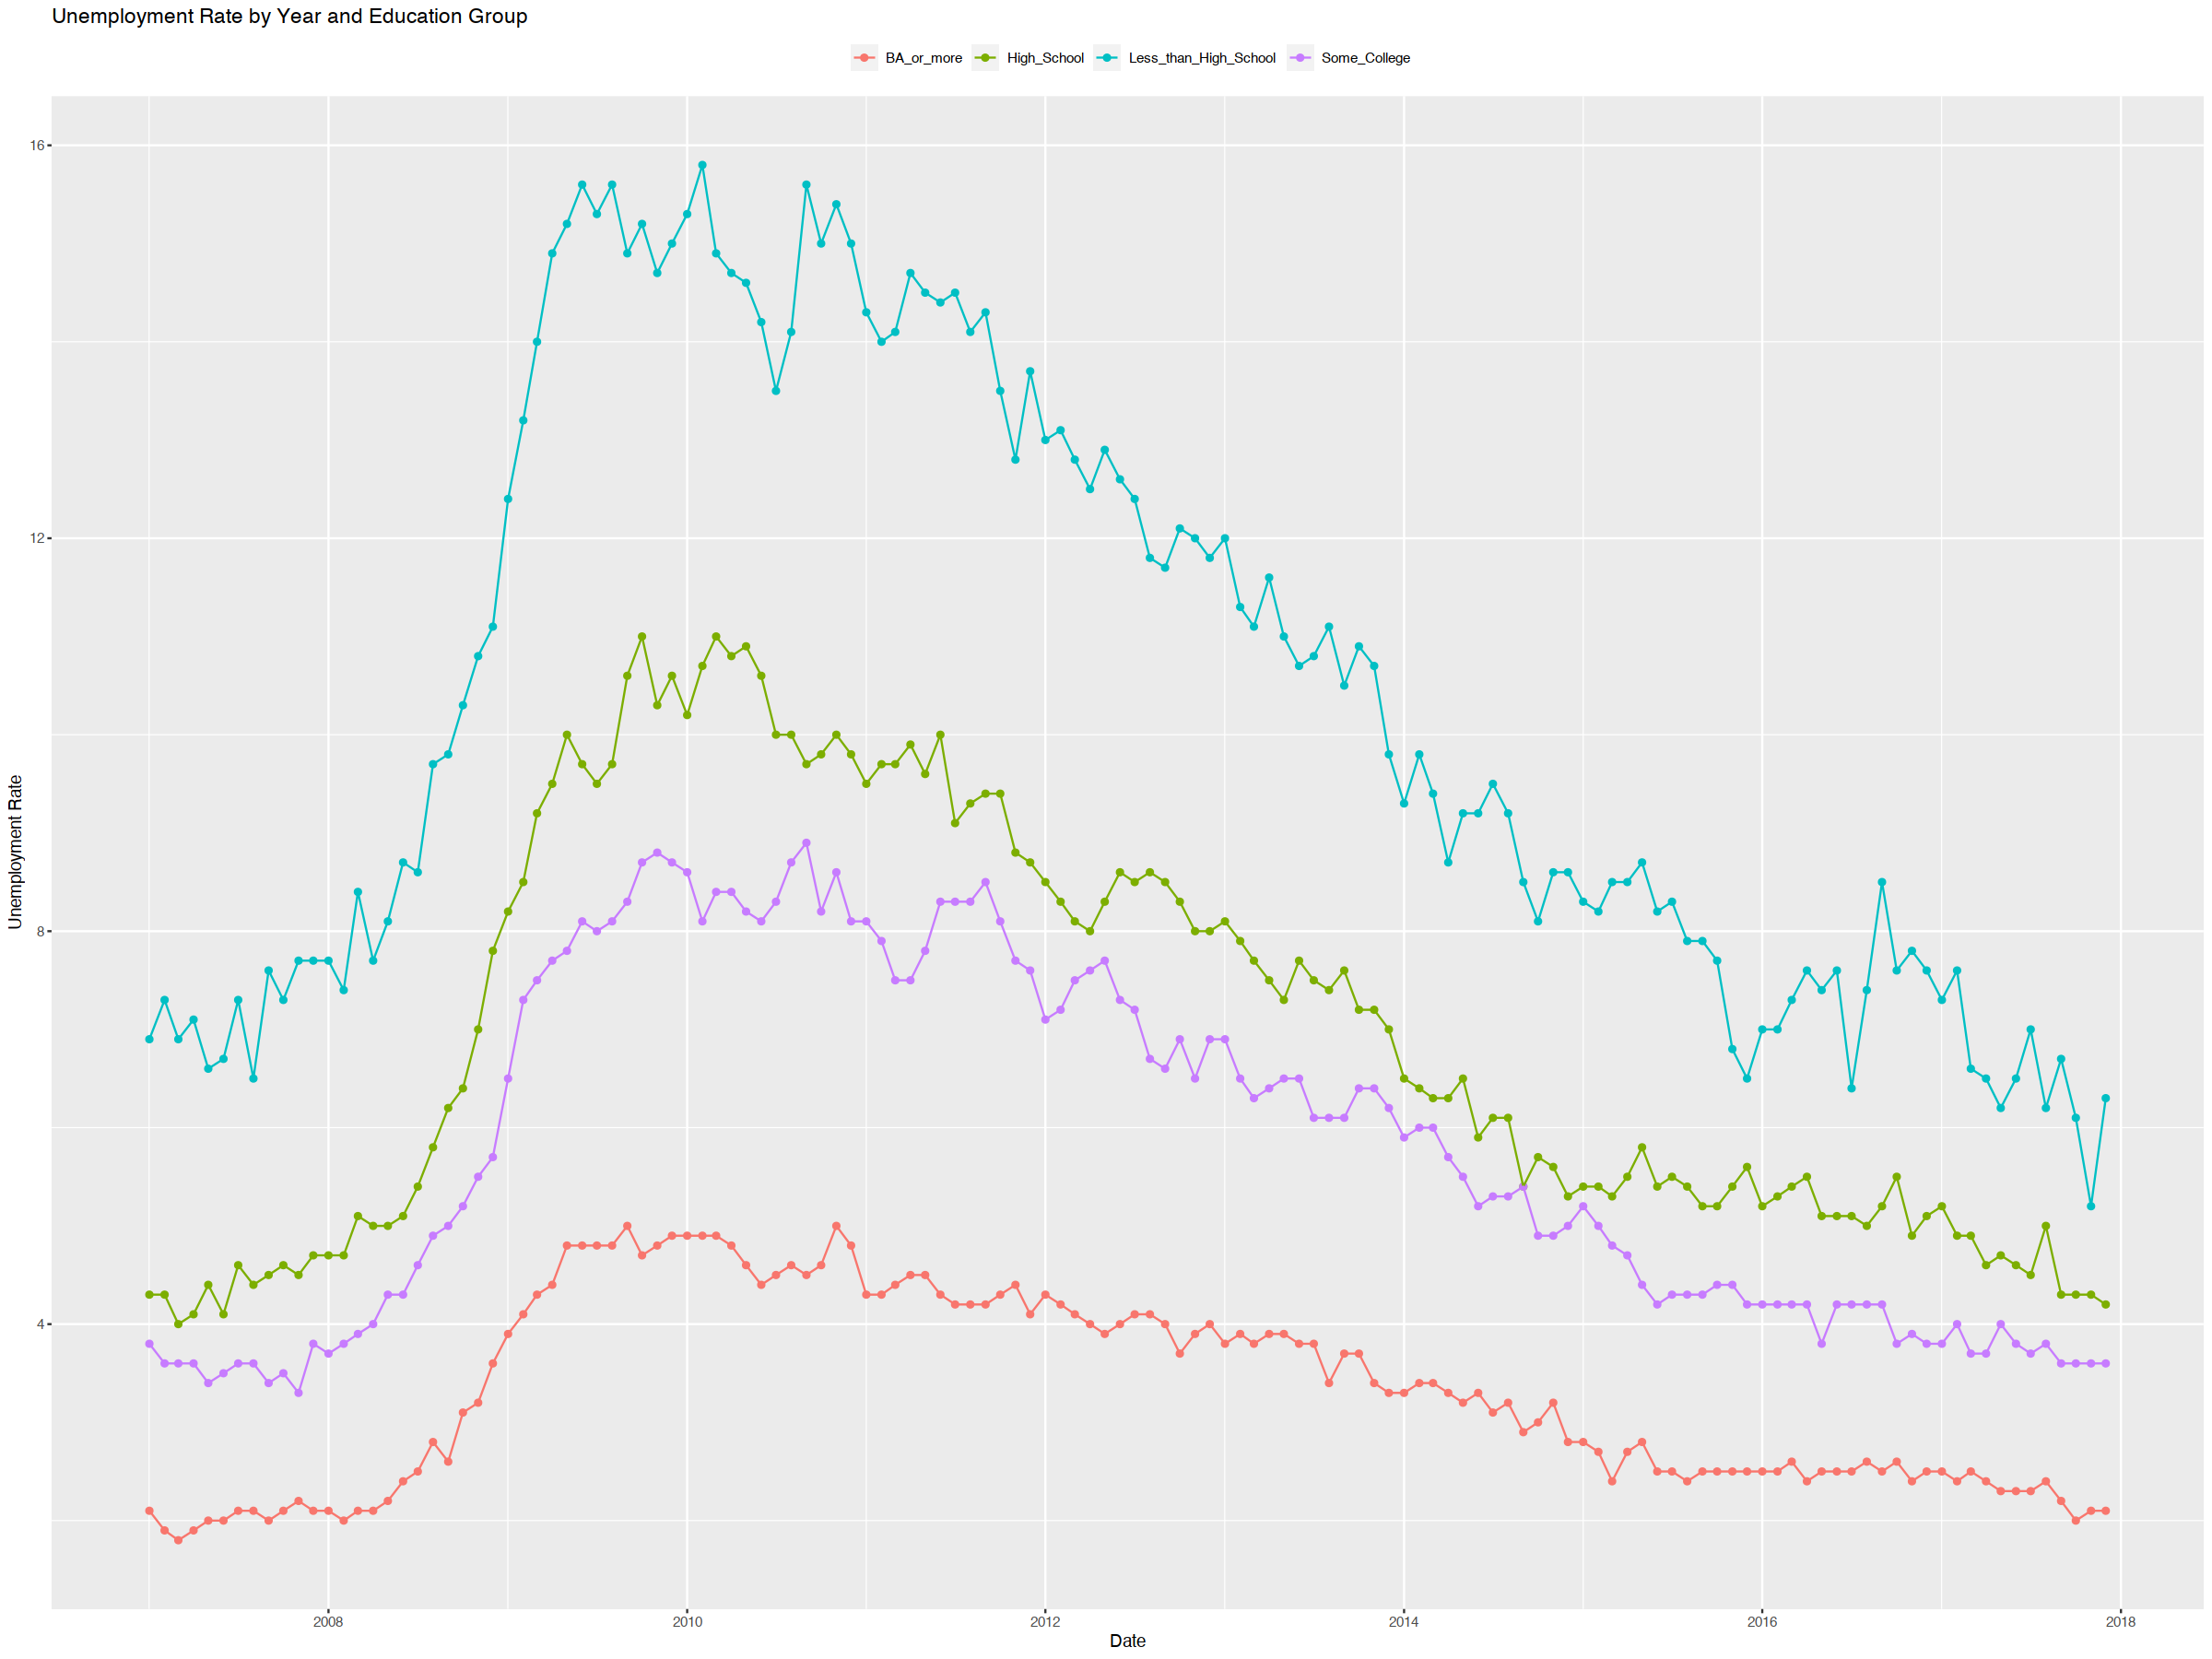

In [13]:
options(repr.plot.width = 20, repr.plot.height = 15) 

ggplot(
    data = urate,
    aes(x = yearmonth, y = rate, color = educ_group)) +
    geom_point() +
    geom_line() +
    theme(legend.position = "top") +
    labs(
        title = "Unemployment Rate by Year and Education Group",
        x = "Date",
        y = "Unemployment Rate",
        color = ""
        )